In [1]:
import operator
from math import log
from collections import Counter
import decisionTreePlot as dtPlot
import numpy as np

In [2]:
def createDataSet():
    dataSet=[[1,1,'yes'],
             [1,1,'yes'],
             [1,0,'no'],
             [0,1,'no'],
             [1,0,'no']]
    labels=['no surfacing','flipper']#字段名称
    return dataSet,labels

In [3]:
def majorityCnt(classList):
    classCount={}
    for vote in classList:
        if vote not in classList:
            classCote[vote]=0
        classCount[vote]+=1
    label=sorted(classCount.items(),key=operator.itemgetter(1),reverse=True)
    return label[0][0]
def majorityCnt2(classList):
#     classCount={}
#     for vote in classList:
#         if vote not in classList:
#             classCote[vote]=0
#         classCount[vote]+=1
    #label=Counter(classCount).most_common(1)[0][0] 2处错误
    label=Counter(classList).most_common(1)[0]#使用collections.Counter可以统计各个标签的出现次数
    return label

In [4]:
def calcShannonEnt(dataSet):
    labelCount={}
    num=len(dataSet)
    classList=[line[-1] for line in dataSet]
    labelCount=dict(Counter(classList))
    shannonEnt=0.0
    #print(type(labelCount))
    
    for key in labelCount:
        #print(labelCount[key])
        #print(key)
        prob=float(labelCount[key])/num
        #print(prob)
        shannonEnt-=prob*log(prob,2)
        
    return shannonEnt

In [5]:
def splitDataSet(dataSet,index,value):
    # 怎么划分？除去特征等于这个value那列 
    subDataSet=[]
    
    #取出 index 列 不重复值
    for featVec in dataSet:
        if featVec[index]==value:
            redSet=featVec[:index]
            redSet.extend(featVec[index+1:])
            subDataSet.append(redSet)
    return subDataSet
            

In [6]:
dataSet=[[1,1,2],
             [1,1,3],
             [1,0,3],
             [0,1,2],
             [1,0,3]]
k=[]

for i in range(1):
    lists=[line[i] for line in dataSet]
    print('jjj',set(lists))
    unique=set(lists)
    for value in unique:
        for feat in dataSet:
            print('ww',feat[i])
            if feat[i]==value:
                #print(feat[:i])
                t=feat[:i]
                t.extend(feat[i+1:])
                k.append(t)
print(k)
print(len(k))
print(len(dataSet))

jjj {0, 1}
ww 1
ww 1
ww 1
ww 0
ww 1
ww 1
ww 1
ww 1
ww 0
ww 1
[[1, 2], [1, 2], [1, 3], [0, 3], [0, 3]]
5
5


In [7]:
def chooseBestFeatureToSplit(dataSet):
    numFeatures=len(dataSet[0])-1
    #计算信息熵
    baseEntropy=calcShannonEnt(dataSet)
    bestInfoGain,bestFeature=0.0,-1
    #featureList=
    #unique=set()
    #for feature in unique:
    for i in range(numFeatures):            #############关键
        # 获取每一个实例的第i+1个feature，组成list集合???? 怎么取特征列表 是取特征值列表 
        # 获取对应的第i个feature下的所有数据
        featureList=[line[i] for line in dataSet]
        
        unique=set(featureList)#特征唯一取值
        print('unique',unique)
        newEntropy=0.0
        #第i个特征 每一唯一值划分一次数据集 计算一次熵值
        for value in unique:
            subDataSet=splitDataSet(dataSet,i,value)#某个特征取这个value的数据集
            #prob=len(dataSet[i]==value)/len(dataSet)                            #数据集中 特征取某值的概率
            prob=len(subDataSet)/len(dataSet) 
            newEntropy+=prob*calcShannonEnt(subDataSet)#######+=
        infoGain=baseEntropy-newEntropy
        print('infoGain',infoGain,'Feature',i)
        if infoGain>bestInfoGain:
            bestInfoGain=infoGain
            bestFeature=i
    return bestFeature

In [8]:
def createTree(dataSet,labels):
    classList=[line[-1] for line in dataSet]
    #1 第一个停止条件 如果所有类别相同返回第一个类别
    if classList.count(classList[0])==len(classList):
        return classList[0]
    #2 第二个停止条件 如果所有特征用完 没有分出唯一类别的分组 最初出现次数最多的一类作为结果
    if len(classList[0])==1:
        return majorityCnt(classList)
    #3 选择信息增益最大的特征
    bestFeat=chooseBestFeatureToSplit(dataSet)
    # 获取最优特征的名称
    bestFeatLabel=labels[bestFeat]
    #初始化myTree 
    myTree={bestFeatLabel:{}}
    #从特征名称列表 删除这个最优特征名称
    del(labels[bestFeat])
    #取出最优特征的值 及唯一值
    featValues=[example[bestFeat] for example in dataSet]
    unique=set(featValues)
    for value in unique:
        #求出剩余特征名称
        subLabels=labels[:]
        #遍历当前特征所有值 在每个数据集划分上递归调用函数creatTree(subDataSet,subLabels) 下面是dataSet 还没删除最优特征列
        myTree[bestFeatLabel][value]=createTree(splitDataSet(dataSet,bestFeat,value),subLabels)
    return myTree   

In [9]:
def classify(inputTree,labels,test):
    # 如何用决策树分类?
    #获取根节点对应 的 key 通过key 获取value（整个第二个字典） 根据根节点的名称获取在labes中的index 
    #根据特征位置获取测试数据对应的value 由这个value 取对应在第二个字典的值
    #firstFeat=inputTree[0]
    firstFeat=list(inputTree.keys())[0]
    secondDict=inputTree[firstFeat]
    firstIndex=labels.index(firstFeat)
    # 在测试数据中 找到根节点对应的label位置 也就知道从输入数据的第几位开始分类
    key=test[firstIndex]#[1,1] 这里面的值决定第二个字典里的key
    valueOfFeat=secondDict[key]
    print('+++',firstFeat,'++',secondDict,'---',key,'>>》',valueOfFeat)
    #判断第二个字典值是否是字典 如果是字典迭代classify 函数 否则 返回这个值
    if isinstance(valueOfFeat,dict):
        classLabel=classify(valueOfFeat,labels,test)
    else:
        classLabel=valueOfFeat
    return classLabel

In [10]:
def test():
    #1.创建数据集和标签
    dataSet,labels=createDataSet()
    #2.创建树模型
    import copy
    myTree=createTree(dataSet,copy.deepcopy(labels))#{'no suffer':{0:'no',1:{'fippyer':{}}}}
    #使用划分好的决策树
    print(classify(myTree,labels,[1,1]))
     # 画图可视化展现
    dtPlot.createPlot(myTree)

In [14]:
def ContactLensesTest():
    fr=open('E:/github/MachineLearning/input/3.DecisionTree/lenses.txt')
    file=[ line.strip().split('\t') for line in fr.readlines()]
    featureName=['age', 'prescript', 'astigmatic', 'tearRate']
    lensesTree=createTree(file,featureName)
    print(lensesTree)
    dtPlot.createPlot(lensesTree)

unique {0, 1}
infoGain 0.17095059445466854 Feature 0
unique {0, 1}
infoGain 0.4199730940219749 Feature 1
unique {0, 1}
infoGain 0.9182958340544896 Feature 0
+++ flipper ++ {0: 'no', 1: {'no surfacing': {0: 'no', 1: 'yes'}}} --- 1 >>》 {'no surfacing': {0: 'no', 1: 'yes'}}
+++ no surfacing ++ {0: 'no', 1: 'yes'} --- 1 >>》 yes
yes


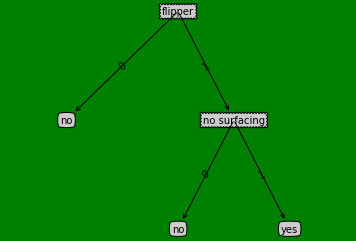

In [12]:
if __name__=='__main__':
    test()

unique {'pre', 'young', 'presbyopic'}
infoGain 0.03939650364612124 Feature 0
unique {'myope', 'hyper'}
infoGain 0.039510835423565815 Feature 1
unique {'yes', 'no'}
infoGain 0.37700523001147723 Feature 2
unique {'normal', 'reduced'}
infoGain 0.5487949406953986 Feature 3
unique {'pre', 'young', 'presbyopic'}
infoGain 0.22125183600446618 Feature 0
unique {'myope', 'hyper'}
infoGain 0.09543725231055489 Feature 1
unique {'yes', 'no'}
infoGain 0.7704260414863776 Feature 2
unique {'pre', 'young', 'presbyopic'}
infoGain 0.2516291673878229 Feature 0
unique {'myope', 'hyper'}
infoGain 0.4591479170272448 Feature 1
unique {'pre', 'young', 'presbyopic'}
infoGain 0.9182958340544896 Feature 0
unique {'pre', 'young', 'presbyopic'}
infoGain 0.3166890883150208 Feature 0
unique {'myope', 'hyper'}
infoGain 0.19087450462110933 Feature 1
unique {'myope', 'hyper'}
infoGain 1.0 Feature 0
{'tearRate': {'normal': {'astigmatic': {'yes': {'prescript': {'myope': 'hard', 'hyper': {'age': {'pre': 'no lenses', 'young

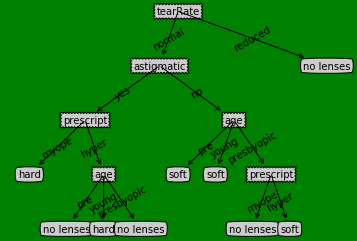

In [15]:
ContactLensesTest()